In [8]:
import re
import csv
import os

def extract_games_from_pgn(filename):
    with open(filename, 'r') as file:
        data = file.read()

    # Regular expression to match the games without the scores
    games = re.findall(r'\b1\.[^\[]+?(?=\s[01]/[012]-[01]/[012])', data, re.DOTALL)

    
    return games

def save_to_csv(games, output_filename):
    with open(output_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['completion'])
        for game in games:
            writer.writerow([game.replace('\n', ' ')])

if __name__ == "__main__":
    # List all files in the current directory with .pgn extension
    pgn_files = [file for file in os.listdir() if file.endswith('.pgn')]
    
    all_games = []
    
    # Extract games from each pgn file and add to the all_games list
    for pgn_file in pgn_files:
        print(pgn_file)
        games = extract_games_from_pgn(pgn_file)
        all_games.extend(games)
    
    save_to_csv(all_games, 'games.csv')


Shirov.pgn
Nakamura.pgn
PolgarS.pgn
Adams.pgn
Carlsen.pgn
Fischer.pgn
Nepomniachtchi.pgn
Tal.pgn
Shulman.pgn
Ljubojevic.pgn
GurevichD.pgn
So.pgn
Andersson.pgn
VachierLagrave.pgn
Karpov.pgn
Bologan.pgn


count    20178.000000
mean        41.206760
std         20.353974
min          0.000000
25%         27.000000
50%         39.000000
75%         52.000000
max        200.000000
dtype: float64


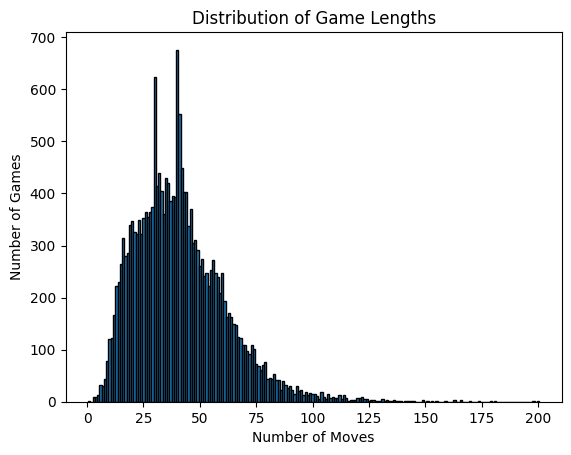

In [9]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
def read_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        games = [row[0] for row in reader]
    return games

# Extract the number of moves from each game
def get_moves_count(game):
    # Split the game string by spaces and divide by 2 (because every 2 strings represent a move for white and black)
    return len(game.split()) // 2

# Analyze the distribution of game lengths
def analyze_distribution(games):
    moves_counts = [get_moves_count(game) for game in games]
    
    # Use pandas for statistical analysis
    series = pd.Series(moves_counts)
    print(series.describe())

    # Plot the distribution
    plt.hist(moves_counts, bins=range(1, series.max() + 2), align='left', edgecolor='black')
    plt.xlabel('Number of Moves')
    plt.ylabel('Number of Games')
    plt.title('Distribution of Game Lengths')
    plt.show()

if __name__ == "__main__":
    games = read_csv('games.csv')
    analyze_distribution(games)


In [10]:
import pandas as pd
import csv
import json 
# File paths
csv_path = 'games.csv'
jsonl_path = 'chess_completions.jsonl'


# Load the games.csv file
df = pd.read_csv(csv_path)

# Prefix text
prefix = '[White "Stockfish ELO 2700"]\n[Black "Stockfish ELO 2700"]\n\n'

with open(csv_path, 'r') as csv_file, open(jsonl_path, 'w') as jsonl_file:
    reader = csv.DictReader(csv_file)

    for row in reader:
        # Prepend the specified text to the completion and store in "text" key
        completion_text = prefix + row['completion']

        # Convert to JSON format with "text" as key
        json_obj = {"text": completion_text}

        # Write to jsonl file
        jsonl_file.write(json.dumps(json_obj) + '\n')

print(f"Conversion complete. Data written to {jsonl_path}")


Conversion complete. Data written to chess_completions.jsonl
